
# Digest and Analyze Correlation CSV Files

## Setup

Note. I copied the generated data from microinstance/data/correlations to ./data because of relative importing.

In [1]:
%load_ext autoreload
%autoreload 1

from matplotlib import pyplot
from Query import Query

base_ticker = "AAPL"
target_ticker = "FB"
name = "5_periods"
length = "25"

# Correlation History between 2 Tickers


data/AAPL-5_periods-25len.csv
0    0.00
1    0.00
2    0.01
3    0.01
4    0.01
Name: FB, dtype: float64


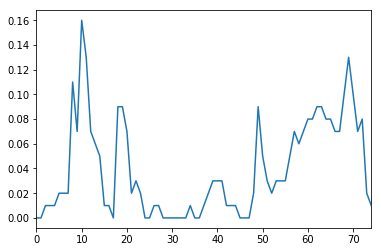

In [2]:
history = Query(base_ticker).ticker_history(target_ticker, name, length)
print(history.head())

history.plot()
pyplot.show()

data/AAPL-5_periods-25len.csv
     FB    DB
0  0.00  0.03
1  0.00  0.04
2  0.01  0.04
3  0.01  0.06
4  0.01  0.05


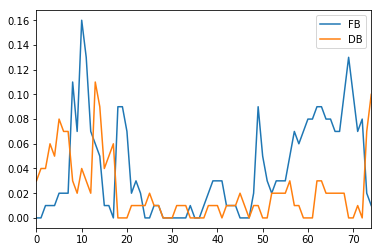

In [3]:
target_tickers = ['FB', 'DB']
comparison = Query(base_ticker).tickers_comparison(target_tickers, name, length)
print(comparison.head())

comparison.plot()
pyplot.show()

## History of tickers with the highest correlation with a ticker

In [4]:
from Query import Query
highs = Query(base_ticker).ticker_highest_corr(name, length)

print(highs.tail())

counts = highs.groupby('target_ticker').count()['value'].sort_values(ascending=False)
print(counts)

data/AAPL-5_periods-25len-high-ticker.csv
    Unnamed: 0 target_ticker     value
70  2017-11-30            FB  0.103329
71  2017-12-01          MSFT  0.074187
72  2017-12-04            FB  0.078815
73  2017-12-05          MSFT  0.218038
74  2017-12-06          MSFT  0.151964
target_ticker
MSFT    34
BAC     34
FB       6
DB       1
Name: value, dtype: int64


## Group History
ie: the group this ticker belongs to by day.

Question: why does it change so much?

In [5]:
from Query import Query
group = Query(base_ticker).ticker_group_history(name, length)

print(group.tail())
counts = group.groupby('group').count()['date'].sort_values(ascending=False)
print(counts)

data/AAPL-5_periods-25len-group-membership.csv
    Unnamed: 0        date  group
70          70  2017-11-30      0
71          71  2017-12-01      0
72          72  2017-12-04      1
73          73  2017-12-05      1
74          74  2017-12-06      0
group
0    28
1    25
2    22
Name: date, dtype: int64


# Correlations with groups by day


data/AAPL-5_periods-25len-group-correlation.csv
   Unnamed: 0         0         1         2
0           2       NaN       NaN       NaN
1  2017-08-22  0.000000  0.000000  0.000000
2  2017-08-23  0.234066  0.184116  0.000000
3  2017-08-24  0.000000  0.154771  0.194459
4  2017-08-25  0.186749  0.000000  0.183943


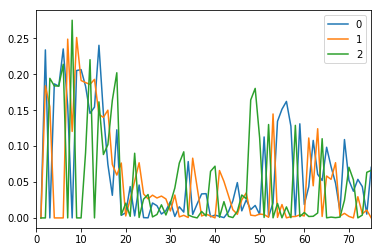

In [6]:
groups = Query(base_ticker).group_correlations(name, length)
print(groups.head())
groups.plot()
pyplot.show()

## which has the highest mean correlation?

In [7]:
print(groups.mean().sort_values(ascending=False))

0    0.063576
2    0.052430
1    0.051017
dtype: float64


In [8]:
print(groups.std().sort_values())

1    0.066083
0    0.069792
2    0.070150
dtype: float64


# Let's combine some queries

1. get the list of unique tickers that have showed up as being the highest correlation for this ticker historical.

In [9]:
highs = Query(base_ticker).ticker_highest_corr(name, length)

tickers = highs.target_ticker.unique()

data/AAPL-5_periods-25len-high-ticker.csv


2. compare those historical correlations with each other to see if some stand out.

data/AAPL-5_periods-25len.csv
     BAC    DB  MSFT    FB
0   0.08  0.03  0.01  0.00
1   0.08  0.04  0.01  0.00
2   0.08  0.04  0.02  0.01
3   0.08  0.06  0.04  0.01
4   0.06  0.05  0.03  0.01
5   0.08  0.08  0.03  0.02
6   0.07  0.07  0.03  0.02
7   0.23  0.07  0.05  0.02
8   0.23  0.03  0.03  0.11
9   0.23  0.02  0.03  0.07
10  0.22  0.04  0.04  0.16
11  0.17  0.03  0.03  0.13
12  0.14  0.02  0.01  0.07
13  0.16  0.11  0.00  0.06
14  0.12  0.09  0.00  0.05
15  0.10  0.04  0.00  0.01
16  0.13  0.05  0.01  0.01
17  0.12  0.06  0.02  0.00
18  0.02  0.00  0.15  0.09
19  0.01  0.00  0.15  0.09
20  0.00  0.00  0.18  0.07
21  0.00  0.01  0.08  0.02
22  0.00  0.01  0.10  0.03
23  0.00  0.01  0.14  0.02
24  0.00  0.01  0.10  0.00
25  0.01  0.02  0.10  0.00
26  0.00  0.01  0.16  0.01
27  0.00  0.01  0.14  0.01
28  0.00  0.00  0.12  0.00
29  0.00  0.00  0.12  0.00
..   ...   ...   ...   ...
45  0.00  0.02  0.03  0.00
46  0.00  0.01  0.02  0.00
47  0.04  0.00  0.00  0.00
48  0.03  0.01  0.00  0.0

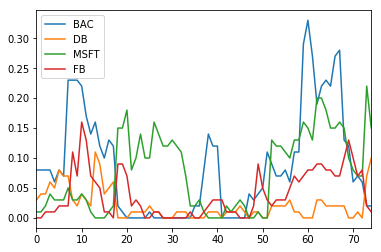

In [10]:
comparison = Query(base_ticker).tickers_comparison(tickers, name, length)
print(comparison)
comparison.plot()
pyplot.show()

# Std Dev

In [11]:
print(comparison.std().sort_values())

DB      0.025364
FB      0.039108
MSFT    0.064366
BAC     0.088365
dtype: float64


In [35]:
means = comparison.mean().sort_values(ascending=False)
print(means)
print(means.index[0], means[0])


BAC     0.087467
MSFT    0.076133
FB      0.039467
DB      0.021600
dtype: float64
BAC 0.0874666666667


<strong>COF ticker has the highest avg correlation and lowest variance. Just what we're looking for.</strong>

In [13]:
history = Query(base_ticker).ticker_history('COF', name, length)
print(history)

data/AAPL-5_periods-25len.csv


KeyError: 'COF'

# What about z-score?


In [ ]:
from scipy.stats import zscore
comparison.apply(zscore) #.mean().sort_values(ascending=False)

<strong>Why does V above have a higher z-score than COV if COV has a higher mean return and lower std?</strong>. I was taking the average of the z-score, which is wrong. The z-score says how many deviations from the mean is our return. It would be a good thing to chart - how many std dev away from the mean is each return.

# Group Correlations

In [ ]:
group = Query(base_ticker).group_correlations(name, length)
mean = group.mean().sort_values(ascending=False) 
print(mean)

In [ ]:
std = group.std().sort_values()
print(std)

In [ ]:
from scipy.stats import zscore
